In [299]:
import numpy as np
import pandas as pd

In [300]:
df = pd.read_csv(r"C:\Users\adivy\Downloads\Bengaluru_House_Data.csv")

In [301]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [302]:
for column in df.columns:
    print(df[column].value_counts())

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
location
Whitefield                                         540
Sarjapur  Road                                     399
Electronic City                                    302
Kanakpura Road                                     273
Thanisandra                                        234
                                                  ... 
Pattegarhpalya                                       1
Tilak Nagar                                          1
12th cross srinivas nagar banshankari 3rd stage      1
Havanur extension                       

In [303]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [304]:
df.drop(columns = ["area_type","availability","society","balcony"], inplace = True)

In [305]:
df['location'] = df['location'].fillna('Sarjapur Road')

In [306]:
df['size'] = df['size'].fillna("2 BHK")

In [307]:
df['bath'] = df['bath'].fillna(df['bath'].median())

In [308]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [309]:
df['total_sqft'].unique()

<StringArray>
[       '1056',        '2600',        '1440',        '1521',        '1200',
        '1170',        '2732',        '3300',        '1310',        '1020',
 ...
        '3124',        '9200',         '613',         '250',        '2395',
 '1020 - 1130',        '2758', '1133 - 1384',         '774',        '4689']
Length: 2117, dtype: str

In [310]:
def sqft(x):
    try:
        x = str(x).strip()

        if '-' in x:
            a = x.split('-')
            return (float(a[0].strip()) + float(a[1].strip())) / 2

        return float(x)

    except:
        return None


In [311]:
df['total_sqft'] = df['total_sqft'].apply(sqft)

In [312]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [313]:
#price per square feet

In [314]:
df['ppsf']= df['price']*100000/df['total_sqft']

In [315]:
df['ppsf']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: ppsf, Length: 13320, dtype: float64

In [316]:
df.describe()

,total_sqft,bath,price,bhk,ppsf
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [317]:
df['location'].value_counts()

location
Whitefield                                         540
Sarjapur  Road                                     399
Electronic City                                    302
Kanakpura Road                                     273
Thanisandra                                        234
                                                  ... 
Pattegarhpalya                                       1
Tilak Nagar                                          1
12th cross srinivas nagar banshankari 3rd stage      1
Havanur extension                                    1
Abshot Layout                                        1
Name: count, Length: 1306, dtype: int64

In [318]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()

In [319]:
location_count

location
Whitefield                                         541
Sarjapur  Road                                     399
Electronic City                                    304
Kanakpura Road                                     273
Thanisandra                                        237
                                                  ... 
Pattegarhpalya                                       1
Tilak Nagar                                          1
12th cross srinivas nagar banshankari 3rd stage      1
Havanur extension                                    1
Abshot Layout                                        1
Name: count, Length: 1295, dtype: int64

In [320]:
locationcount_lessthan_5 = location_count[location_count<= 5]
locationcount_lessthan_5

location
RMV Extension                                      5
Jakkuru Layout                                     5
Nagondanahalli                                     5
Off Sarjapur Road,                                 5
Silk Board                                         5
                                                  ..
Pattegarhpalya                                     1
Tilak Nagar                                        1
12th cross srinivas nagar banshankari 3rd stage    1
Havanur extension                                  1
Abshot Layout                                      1
Name: count, Length: 910, dtype: int64

In [321]:
df['location'] = df['location'].apply(lambda x:'other' if x in locationcount_lessthan_5 else x)

In [322]:
df['location'].value_counts()

location
other                             1800
Whitefield                         541
Sarjapur  Road                     399
Electronic City                    304
Kanakpura Road                     273
                                  ... 
Bagalakunte                          6
Nagawara Junction                    6
Doddanakundi Industrial Area 2       6
Amblipura                            6
Hennur Bande                         6
Name: count, Length: 386, dtype: int64

In [323]:
df.describe()

,total_sqft,bath,price,bhk,ppsf
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [324]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [327]:
df = df[((df['total_sqft']/df['bhk']>= 50))]
df.describe()

,total_sqft,bath,price,bhk,ppsf
count,13234.000000,13234.000000,13234.000000,13234.000000,13234.000000
mean,1562.598665,2.674097,112.418982,2.786081,6660.544169
std,1238.886522,1.271661,149.193503,1.212650,4501.659913
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,50.000000,2.000000,4262.458363
50%,1278.500000,2.000000,71.735000,3.000000,5420.872534
75%,1680.000000,3.000000,120.000000,3.000000,7279.971402
max,52272.000000,27.000000,3600.000000,27.000000,176470.588235


In [328]:
df['ppsf'].describe()

count     13234.000000
mean       6660.544169
std        4501.659913
min         267.829813
25%        4262.458363
50%        5420.872534
75%        7279.971402
max      176470.588235
Name: ppsf, dtype: float64

In [329]:
def ppsf_outlier (column):
    mean = column.mean()
    std = column.std()

    upper_limit = mean + 3*std
    lower_limit = mean - 3*std

    return column.apply(lambda x: upper_limit if x> upper_limit
    else lower_limit if x< lower_limit
    else x)

In [330]:
df['ppsf'] = ppsf_outlier(df['ppsf'])
df['ppsf'].describe()


count    13234.000000
mean      6542.468816
std       3660.621553
min        267.829813
25%       4262.458363
50%       5420.872534
75%       7279.971402
max      20165.523909
Name: ppsf, dtype: float64

In [331]:
df['bhk'].describe()

count    13234.000000
mean         2.786081
std          1.212650
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         27.000000
Name: bhk, dtype: float64

In [332]:

mean = df['bhk'].mean()
std = df['bhk'].std()
    
upper_boundary = mean + std*3
lower_boundary = mean - std*3


def bhk_outliers (x):
    if x> upper_boundary:
        return upper_boundary
    if x< lower_boundary:
        return lower_boundary
    else:
        return x
                
    

    


In [333]:
df['bhk'] = df['bhk'].apply(bhk_outliers)

In [334]:
df['bhk'].describe()

count    13234.000000
mean         2.754565
std          1.060268
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          6.424032
Name: bhk, dtype: float64

In [335]:
df.shape

(13234, 7)

In [336]:
df

,location,size,total_sqft,bath,price,bhk,ppsf
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


In [337]:
df.drop(columns = ['ppsf','size'], inplace = True)

In [338]:
df

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5.0
13316,Richards Town,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4689.0,4.0,488.00,4.0


In [339]:
df.head(5)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4.0
2,Uttarahalli,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3.0
4,Kothanur,1200.0,2.0,51.00,2.0


In [340]:
df['location'].nunique()

386

In [341]:
df.to_csv("Cleaned_data.csv")

In [342]:
X = df.drop(columns = ['price'])
Y = df['price']

In [343]:
X.shape

(13234, 4)

In [344]:
Y.shape

(13234,)

In [345]:
from matplotlib import pyplot as plt

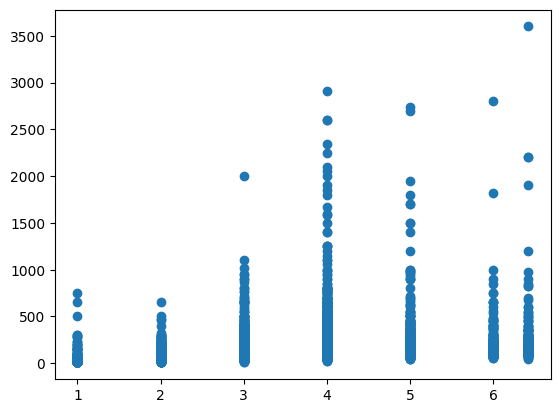

In [346]:
plt.scatter(X.values[:,3],Y.values)

In [347]:
#training and testing of data

In [348]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [349]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [350]:
 column_trans = make_column_transformer((OneHotEncoder(sparse_output =False),['location']), remainder='passthrough')

In [351]:
scaler = StandardScaler()

In [352]:
pipe = make_pipeline(column_trans,scaler,LinearRegression())

In [353]:
pipe.fit(X_train,Y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('standardscaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehotencoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the dif

In [354]:
pred = pipe.predict(X_test)

In [355]:
r2_score(Y_test,pred)

0.5657833822609303